In [21]:
import pandas as pd
df = pd.read_csv('Social_Media_Engagement.csv')

In [23]:
import pandas as pd
import sqlalchemy as sal
engine= sal.create_engine('mssql://LAPTOP-U102O454\SQLEXPRESS/Projects?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn = engine.connect()

In [24]:
df.to_sql('Social_Media_Engagement', con=conn,index=False,if_exists='replace')
conn.close()

In [26]:
df.shape

(12000, 28)

In [27]:
df.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


Data Cleaning

In [31]:
df.dtypes

post_id                     object
timestamp                   object
day_of_week                 object
platform                    object
user_id                     object
location                    object
language                    object
text_content                object
hashtags                    object
mentions                    object
keywords                    object
topic_category              object
sentiment_score            float64
sentiment_label             object
emotion_type                object
toxicity_score             float64
likes_count                  int64
shares_count                 int64
comments_count               int64
impressions                  int64
engagement_rate            float64
brand_name                  object
product_name                object
campaign_name               object
campaign_phase              object
user_past_sentiment_avg    float64
user_engagement_growth     float64
buzz_change_rate           float64
dtype: object

In [32]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [34]:
df.dtypes

post_id                            object
timestamp                  datetime64[ns]
day_of_week                        object
platform                           object
user_id                            object
location                           object
language                           object
text_content                       object
hashtags                           object
mentions                           object
keywords                           object
topic_category                     object
sentiment_score                   float64
sentiment_label                    object
emotion_type                       object
toxicity_score                    float64
likes_count                         int64
shares_count                        int64
comments_count                      int64
impressions                         int64
engagement_rate                   float64
brand_name                         object
product_name                       object
campaign_name                     

In [36]:
df.isna().sum()

post_id                       0
timestamp                     0
day_of_week                   0
platform                      0
user_id                       0
location                      0
language                      0
text_content                  0
hashtags                      0
mentions                   3941
keywords                      0
topic_category                0
sentiment_score               0
sentiment_label               0
emotion_type                  0
toxicity_score                0
likes_count                   0
shares_count                  0
comments_count                0
impressions                   0
engagement_rate               0
brand_name                    0
product_name                  0
campaign_name                 0
campaign_phase                0
user_past_sentiment_avg       0
user_engagement_growth        0
buzz_change_rate              0
dtype: int64

Exploratory Data Analysis

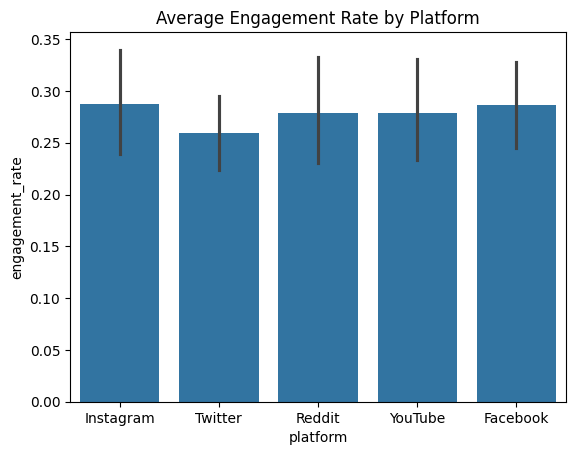

In [38]:
 #Engagement by Platform
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df,x='platform', y='engagement_rate', estimator='mean')
plt.title('Average Engagement Rate by Platform')
plt.show()

C:\Users\Shyam\AppData\Local\Temp\ipykernel_18072\3872593994.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='coolwarm')


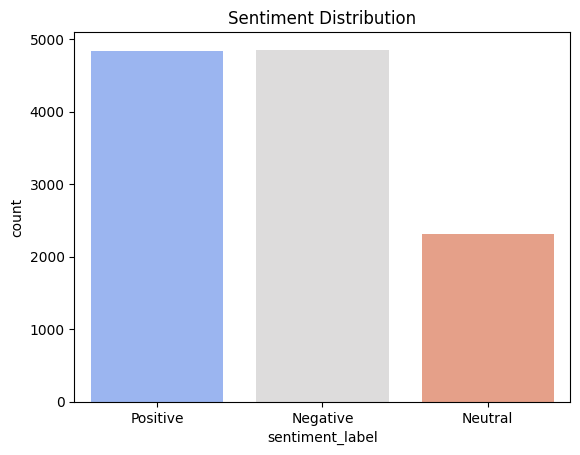

In [39]:
#Sentiment Distribution
sns.countplot(data=df, x='sentiment_label', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

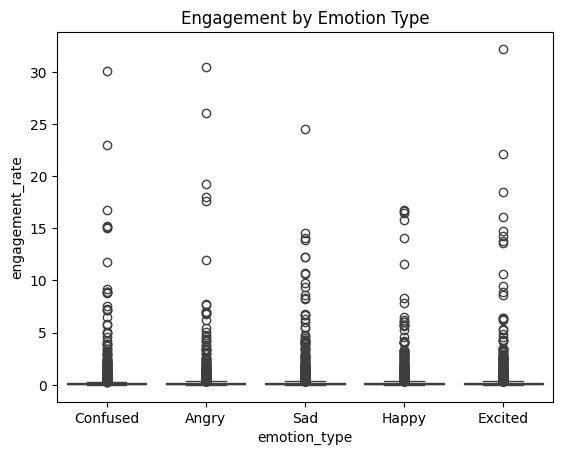

In [41]:
# Emotion Type vs. Engagement
sns.boxplot(data=df, x='emotion_type', y='engagement_rate')
plt.title('Engagement by Emotion Type')
plt.show()

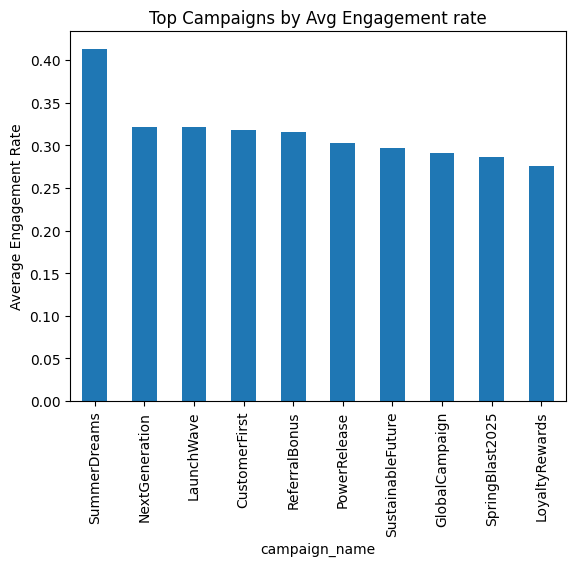

In [43]:
# Campaign Performance
top_campaigns=df.groupby('campaign_name')['engagement_rate'].mean().sort_values(ascending=False).head(10)
top_campaigns.plot(kind='bar', title='Top Campaigns by Avg Engagement rate')
plt.ylabel('Average Engagement Rate')
plt.show()

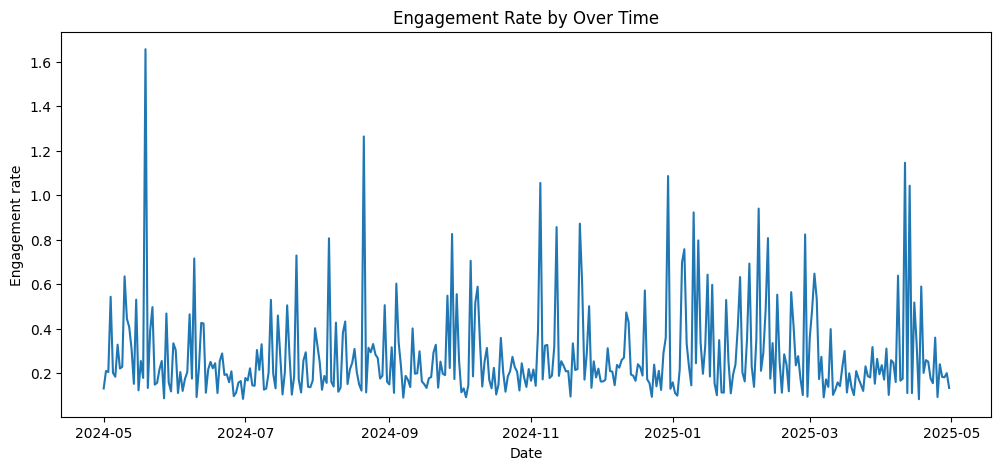

In [46]:
df['date']=df['timestamp'].dt.date
daily_engagement=df.groupby('date')['engagement_rate'].mean()
plt.figure(figsize=(12,5))
daily_engagement.plot()
plt.title('Engagement Rate by Over Time')
plt.xlabel('Date')
plt.ylabel('Engagement rate')
plt.show()

In [55]:
df.to_csv('cleaned_social_media_egagement.xlsx',index=False)